## Máquinas de soporte vectorial (SVM)

Es un algoritmo de aprendizaje supervisado donde el objetivo es maximizar el margen definido por la distancia entre el hiperplano de separación y los puntos (de los datos de entrenamiento) más cercanas al hiperplano. Estos puntos son denominados _vectores soporte_.

La idea que hay detrás de las SVM de _margen máximo_ consiste en seleccionar el hiperplano separador que está a la misma distancia de los puntos más cercanos de cada clase.
<pre>
<center><img src="https://drive.google.com/uc?export=view&id=1crLg69QBCKqZdP5_G4gzAPRp_4dT7PPh" width=800></center>
</pre>

Las SVM tienen en su implementación una variable de holgura _C_ que permite que las restricciones no se cumplan de manera estricta. Esto es necesario en el caso de conjuntos que no son linealmente separables.

<pre>
<center><img src="https://drive.google.com/uc?export=view&id=1csLqFA0B9eR5S7LAWJ9llpX3a3Kfa_a0" width=800></center>
</pre>

### ⚠️
Es un modelo muy sensible a la diferencia de escalas de los atributos, por lo que **es necesario esalar los datos**.

A continuación vamos a usar las SVM con algunos datasets guardados en la carpeta data: 'data1.mat', 'data2.mat' y 'data3.mat' 📁

In [2]:
# importamos las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from modules.funciones_auxiliares import plot_decision_regions

### Dataset Nº 1

In [ ]:
import scipy.io as sio
arch_mat = sio.loadmat('data/data1.mat')

X = arch_mat['X']
y = arch_mat['y'].flatten()
X

Grafique los datos. Este dataset es linealmente separable. Notar que se tiene un outlier en una de las clases. Parte de este ejercicio es **probar con diferentes valores del parámetro C** y ver qué efecto tiene la presencia del outlier en la región de separación.

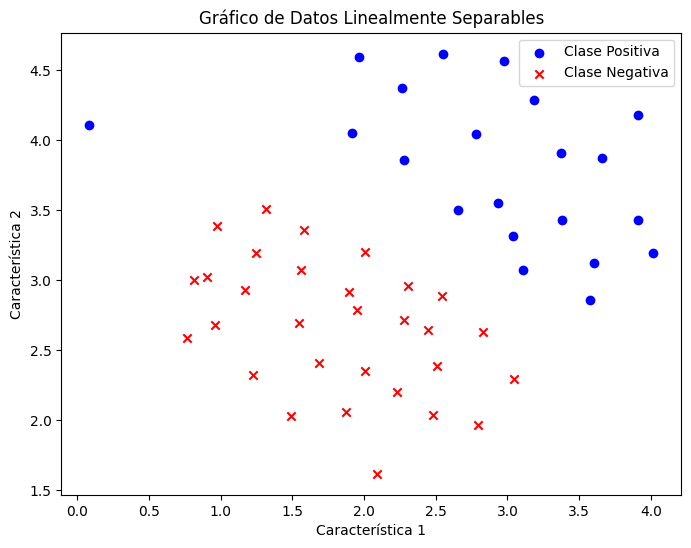

In [42]:
X_pos = X[y == 1]#seleccionamos los ejemplos positivos
X_neg = X[y == 0]#seleccionamos los ejemplos negativos

plt.figure(figsize=(8, 6)) #tamaño de la figura
plt.scatter(X_pos[:, 0], X_pos[:, 1], c='blue', marker='o', label='Clase Positiva') #graficamos los ejemplos positivos
plt.scatter(X_neg[:, 0], X_neg[:, 1], c='red', marker='x', label='Clase Negativa')#graficamos los ejemplos negativos

plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.title('Gráfico de Datos Linealmente Separables')
plt.show()

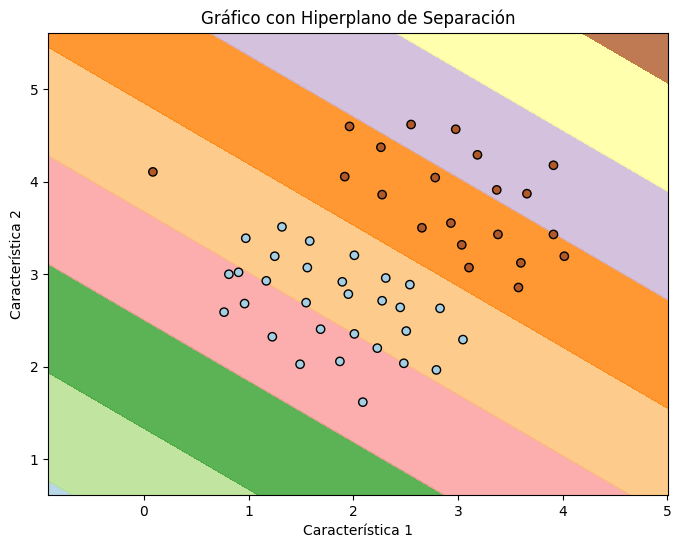

In [47]:
from sklearn.svm import SVC

# Entrena un SVM lineal
svm = SVC(kernel='linear')
svm.fit(X, y)

coef = svm.coef_[0]
intercept = svm.intercept_[0]

# Definir los límites del gráfico
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Crear una malla de puntos
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Evaluar la ecuación del hiperplano en la malla
z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

plt.figure(figsize=(8, 6))

# Graficar el hiperplano de separación
plt.contourf(xx, yy, z, cmap=plt.cm.Paired, alpha=0.8)

# Graficar los puntos de las clases
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Gráfico con Hiperplano de Separación')
plt.show()


In [45]:
coef

array([1.40718563, 2.13398052])

Realice los pasos necesarios para entrenar una SVM con kernel lineal. No es necesario para este ejercicio separar los datos en entrenamiento y prueba. Después grafique la región de decisión usando la función `plot_decision_regions` de 'funciones_auxiliares.py'

### Dataset Nº 2
### SVM con kernel Gaussiano

Uno de los _kernels_ más utilizado es el __radial basis function__ (RBF), que se conoce como __kernel Gaussiano__

Como verá en la gráfica, los datos no son linealmente separables. Con el kernel Gaussiano, el algoritmo del SVM podrá encontrar la región de decisión capaz de separar los datos correctamente y seguir los contornos del dataset.

La idea principal detrás del uso de _kernels_ con datos que no son linealmente separables, es crear combinaciones no lineales de las características originales y proyectarlas en un espacio de mayor dimensión (mapeo mediante una función), donde los datos se vuelven linealmente separables.

**Esta vez pruebe con distintos valores de `C` y `gamma`, cómo afectan los mismos en la región de decisión?**

### Dataset Nº 3
El siguiente dataset _data3.mat_ posee datos para entrenamiento (_X_, _y_) y datos para validación (_X_val_, _y_val_)

Realice los pasos necesarios para entrenar una SVM con kernel gaussiano usando los datos de entrenamiento. Implemente in algoritmo para probar con distintos valores de `C` `[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]` y `gamma` `[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]` y obtenga la combinación de parámetros (`C`, `gamma`) que produzca el mejor desempeño del clasificador al evaluarla con los datos de validación. Puede utilizar el método `score()` del objeto.

Después grafique la región de decisión de la SVM con los parámetros obtenidos, usando la función `plot_decision_regions` de 'funciones_auxiliares.py'